**CUSTOMER SEGMENTATION CLUSTERING**

**Introduction**

In the growing digital era, a deep understanding of customers is one of the keys to business success. Customer segmentation is a strategic approach to divide customers into groups based on similar characteristics, so that companies can offer more relevant and personalized products or services.

In this project, I apply unsupervised learning, specifically clustering techniques, to perform customer segmentation. By utilizing algorithms such as K-Means Clustering, I analyzed customer data to identify hidden patterns and produce meaningful segmentation.

Main Objective of the Project
 - Segment customers based on certain characteristics such as purchase behavior, demographics, or transaction value.
 - Provide actionable insights to improve customer retention, offer personalization, and marketing campaign effectiveness.
 - Develop data-driven business strategies to improve customer satisfaction and company profitability.


Methodology This project involved several key stages:

 - Data Exploration and Cleaning

 - Handling missing data, outliers, and feature standardization.
Clustering Algorithm Selection and Application

 - Use of evaluation metrics such as Silhouette Score and Elbow Method to determine the optimal number of clusters.
 - Result Analysis and Cluster Interpretation

 - Visualization of clustering results with techniques such as PCA (Principal Component Analysis) and 2D/3D plots.
 - Strategic Recommendation

Linking the segmentation results to relevant business strategies.
This project showcases my understanding in data analysis, mastery of machine learning algorithms, and ability to turn the analysis results into recommendations that can be implemented by businesses.

**Import Data**

Import data from **Kaggle**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishakhdapat/customer-segmentation-clustering")

print("Path to dataset files:", path)

100%|██████████| 62.0k/62.0k [00:00<00:00, 29.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vishakhdapat/customer-segmentation-clustering/versions/1


**Import Library**

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN

**Load Data**

In [3]:
# List files in the downloaded dataset folder
for file in os.listdir(path):
    print(file)

file_path = os.path.join(path, 'customer_segmentation.csv')

df = pd.read_csv(file_path)

customer_segmentation.csv


In [4]:
df.head(2,)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From above prompt we have 2240 non-null data, only in column have missing values

**Cleaning Data**

Fill missing values with median

In [6]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [7]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Feature Engineering**

Extract `Dt_customer` to `dt_year`, `dt_month`, `dt_day`, `dt_day_name`. Make new column `age` from substracted `dt_year` - `Year_Birth`. Make new column `purchase` from `MntWines` + `MntFruits` + `MntMeatProducts` + `MntFishProducts` + `MntSweetProducts` + `MntGoldProds`

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['dt_year'] = df['Dt_Customer'].dt.year
df['dt_month'] = df['Dt_Customer'].dt.month
df['dt_day'] = df['Dt_Customer'].dt.day
df['dt_day_name'] = df['Dt_Customer'].dt.day_name()
df['age'] = df['dt_year'] - df['Year_Birth']
df['purchase'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,dt_year,dt_month,dt_day,dt_day_name,age,purchase
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,2012,9,4,Tuesday,55,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,2014,3,8,Saturday,60,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,2013,8,21,Wednesday,48,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,2014,2,10,Monday,30,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,2014,1,19,Sunday,33,422


Drop column `ID`, `Dt_Customer`, `dt_year`, `Year_birth`

In [9]:
df_clean = df.drop(['ID', 'Dt_Customer', 'dt_year', 'Year_Birth'], axis=1)

If data type object change to numerik, use LabelEncoder

In [10]:
label_encoder = LabelEncoder()
df_clean['Education'] = label_encoder.fit_transform(df_clean['Education'])
df_clean['Marital_Status'] = label_encoder.fit_transform(df_clean['Marital_Status'])
df_clean['dt_day_name'] = label_encoder.fit_transform(df_clean['dt_day_name'])

In [11]:
df_clean.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dt_month,dt_day,dt_day_name,age,purchase
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,3,11,1,9,4,5,55,1617
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,3,11,0,3,8,2,60,27
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,3,11,0,8,21,6,48,776
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,3,11,0,2,10,1,30,53
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,3,11,0,1,19,3,33,422


Uses the describe() function to provide a summary of the dataset's descriptive statistics. These statistics include important metrics such as number of data (count), average (mean), standard deviation (std), minimum value (min), quartiles (25%, 50%, 75%), and maximum value (max). This information helps to understand the data distribution and identify potential outliers.

In [12]:
df_clean.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dt_month,dt_day,dt_day_name,age,purchase
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.393750,3.729911,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.013393,0.009375,3.0,11.0,0.149107,6.467411,15.638393,2.950446,44.222321,605.798214
std,1.124797,1.076277,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.114976,0.096391,0.0,0.0,0.356274,3.486695,8.790680,2.024581,12.022855,602.249288
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1.000000,0.000000,16.000000,5.000000
25%,2.000000,3.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,3.0,11.0,0.000000,3.000000,8.000000,1.000000,36.000000,68.750000
50%,2.000000,4.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,3.0,11.0,0.000000,6.000000,16.000000,3.000000,43.000000,396.000000
75%,3.000000,5.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,3.0,11.0,0.000000,10.000000,23.000000,5.000000,54.000000,1045.500000
max,4.000000,7.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,3.0,11.0,1.000000,12.000000,31.000000,6.000000,121.000000,2525.000000


**Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a dimension reduction technique that transforms high-dimensional data into principal components with the greatest variability. In this process, the original features are re-represented into a new space, allowing for simpler visualization without losing important information. PCA helps identify dominant patterns in data and speeds up analysis processes, such as clustering or classification.

Before PCA, we must standard all feature

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

Using StandardScaler to standardize the data by converting it to a distribution with a mean of 0 and a standard deviation of 1. This process is important to ensure that each feature has the same scale, especially in machine learning algorithms such as K-Means or PCA, which are sensitive to scale differences between features.

PCA only for 2 components

Applying PCA (Principal Component Analysis) to reduce the dimensionality of a dataset while retaining as much variance information as possible. PCA helps visualize high-dimensional data in a two- or three-dimensional space, and improves the efficiency of machine learning models by reducing redundancy between features.

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

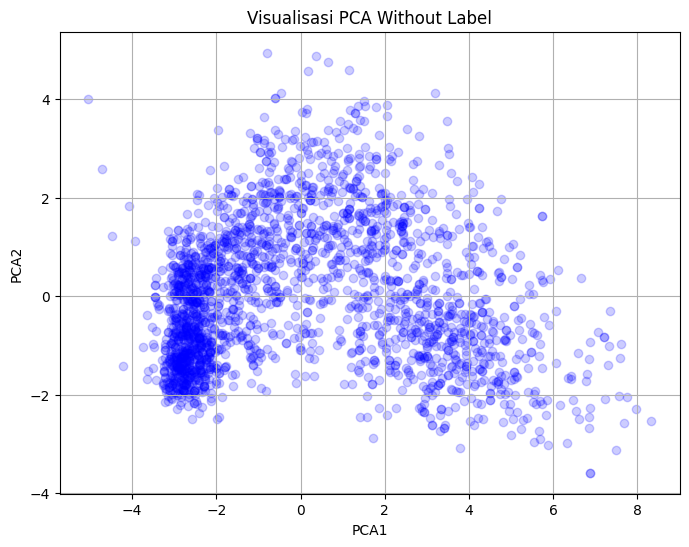

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.2)
plt.title('Visualisasi PCA Without Label')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid()
plt.show()

The Individual Factor Map visualization uses PCA to reduce the dimensionality of the data into two principal components (PC1 and PC2). This plot shows the distribution of individuals in the dataset, with the axes representing the percentage of variance explained by each component. The zero line on the axes helps to understand the pattern of the distribution of the data with respect to its center

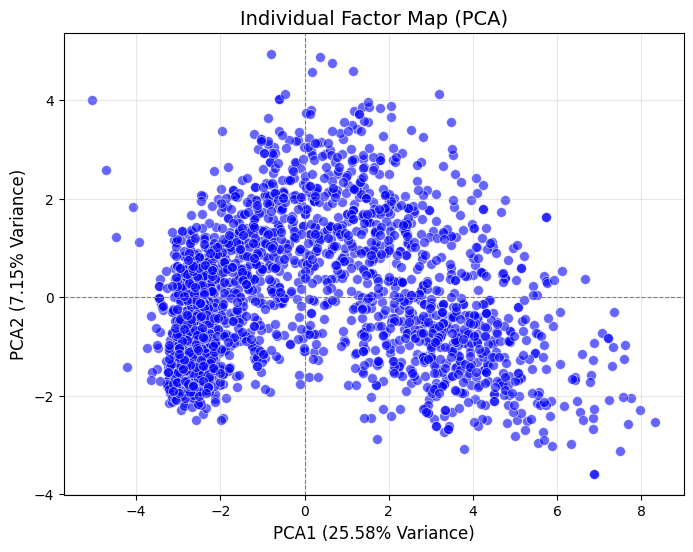

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', s=50, color='blue', alpha=0.6)
plt.title('Individual Factor Map (PCA)', fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel(f"PCA1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)", fontsize=12)
plt.ylabel(f"PCA2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

From above plot we see PCA1 25.5% and PCA2 7.15%

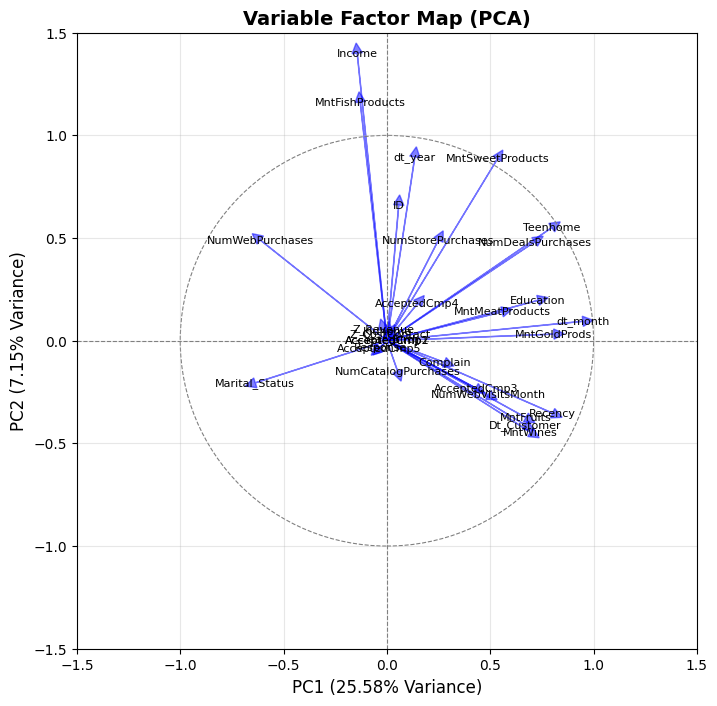

In [48]:
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Plot Variable Factor Map
plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(components[0], components[1])):
    scale_factor = 2.7
    plt.arrow(0, 0, x * scale_factor, y * scale_factor, color='blue', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(x * scale_factor * 1, y * scale_factor * 1, df.columns[i], color='black', fontsize=8,
             ha='center', va='center')
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', linewidth=0.8)
plt.gca().add_artist(circle)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Variable Factor Map (PCA)', fontsize=14, weight='bold')
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}% Variance)", fontsize=12)
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}% Variance)", fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

if the direction of the same arrow is in the positive direction, it can be called a positive high correlation, if the direction of the same arrow is in the negative direction, it can be called a negative high correlation.

**K-Means Clustering**

Apply the K-Means Clustering algorithm to group data into clusters based on similar features. This algorithm works by determining the optimal centroid for each cluster and minimizing the distance between data within the same cluster. The results provide useful insights for customer segmentation or other hidden patterns.

For K-Means clustering we use elbow method

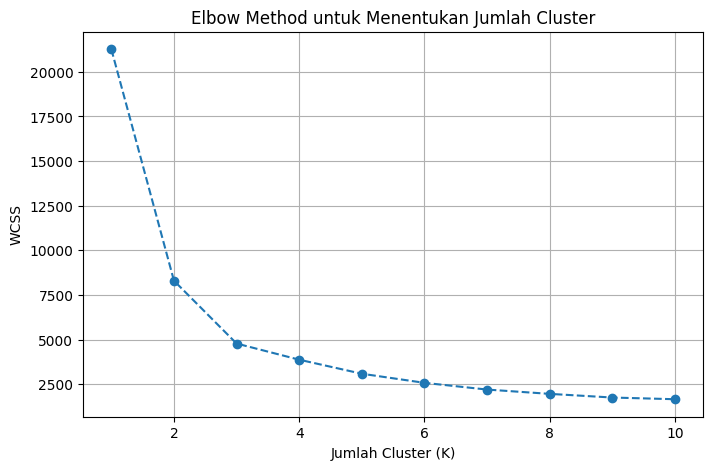

In [19]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Forom above method we see elbow in 3

Visualization of K-Means Clustering results uses PCA (Principal Component Analysis) to reduce the dimensionality of the data to 2D space. Each color in the plot represents the clusters formed, while PCA helps illustrate the distribution of data and patterns between clusters more intuitively.

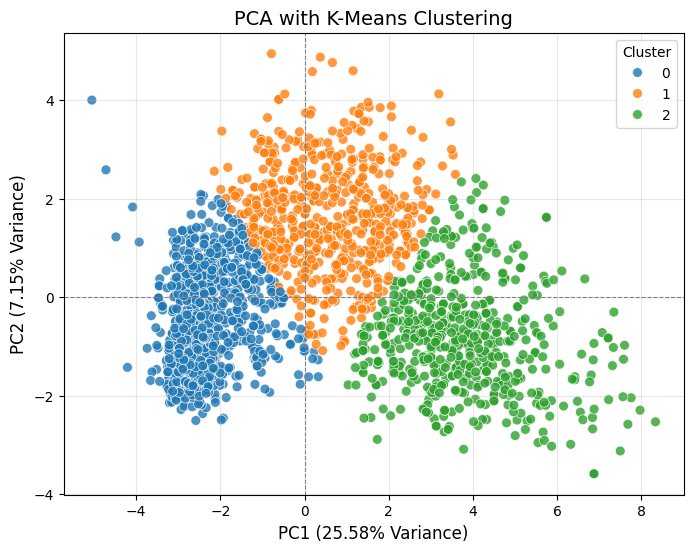

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=50, alpha=0.8)
plt.title('PCA with K-Means Clustering', fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)", fontsize=12)
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.show()

In [21]:
pca_df['Cluster'].value_counts()

,count
Cluster,
0,1062
1,609
2,569


Cluster 0 is most value counts

In [22]:
centroids = kmeans.cluster_centers_

print("Cluster Center Coordinates (Centroid):")
for i, center in enumerate(centroids):
    print(f"Cluster {i}: {center}")

Cluster Center Coordinates (Centroid):
Cluster 0: [-2.35246364 -0.49222647]
Cluster 1: [0.57981098 1.63859354]
Cluster 2: [ 3.77529661 -0.83133241]


every cluster above we see central coordinat

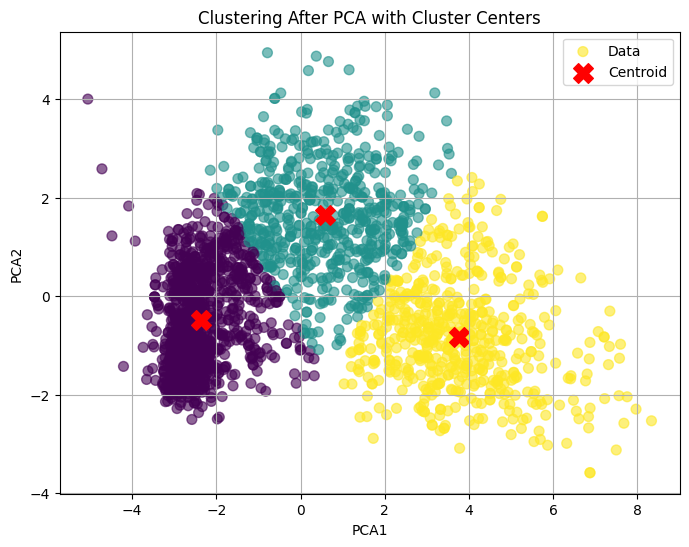

In [23]:
plt.figure(figsize=(8, 6))

plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', s=50, alpha=0.6, label='Data')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroid')

plt.title('Clustering After PCA with Cluster Centers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()

Assessing clustering quality

**Silhoute Score**

Using Silhouette Score to evaluate the quality of the clusters formed. This score measures how well the data in one cluster are close to each other (cohesion) compared to the data in other clusters (separation). The higher the Silhouette Score value, the better the resulting clustering structure

In [24]:
sil_score = silhouette_score(pca_df, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5297438362720666


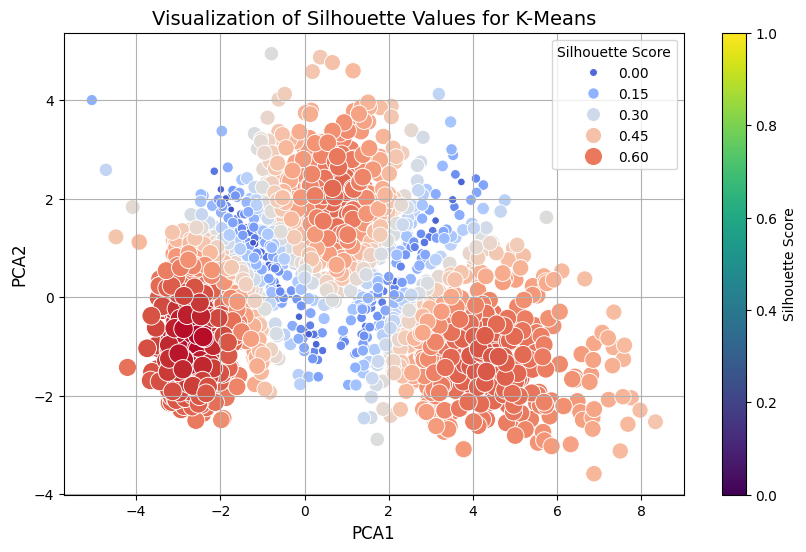

In [25]:
silhouette_vals = silhouette_samples(pca_df[['PCA1', 'PCA2']], kmeans.labels_)

pca_df['Silhouette'] = silhouette_vals

plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    x='PCA1', y='PCA2', hue='Silhouette', data=pca_df,
    palette='coolwarm', size='Silhouette', sizes=(20, 200), marker='o')

plt.title('Visualization of Silhouette Values for K-Means', fontsize=14)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)

plt.colorbar(scatter.collections[0], label='Silhouette Score')

plt.grid(True)
plt.legend(title='Silhouette Score', loc='upper right')
plt.show()

From above plot we can see value silhoutte score high near of central centroid

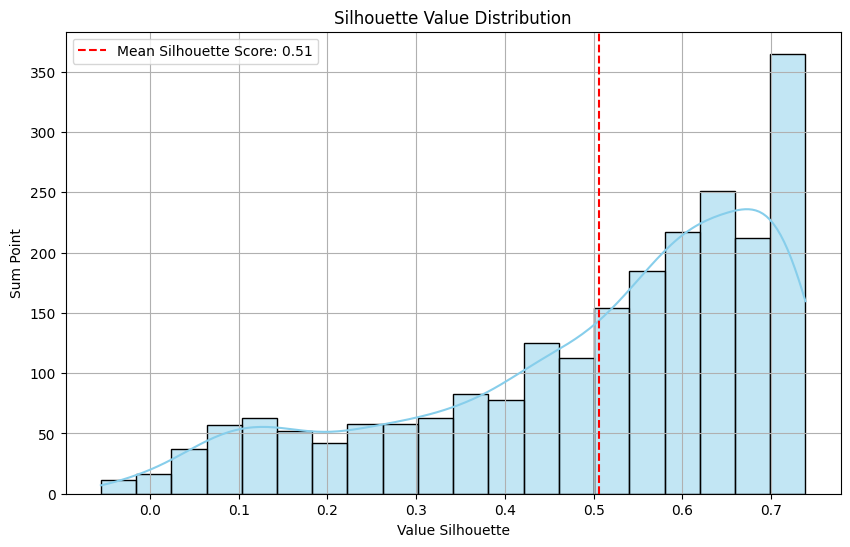

In [26]:
silhouette_vals = silhouette_samples(pca_df[['PCA1', 'PCA2']], kmeans.labels_)
plt.figure(figsize=(10, 6))
sns.histplot(silhouette_vals, kde=True, bins=20, color='skyblue', edgecolor='black')

mean_silhouette = silhouette_vals.mean()
plt.axvline(mean_silhouette, color='red', linestyle='--', label=f'Mean Silhouette Score: {mean_silhouette:.2f}')

plt.title('Silhouette Value Distribution')
plt.xlabel('Value Silhouette')
plt.ylabel('Sum Point')
plt.legend()
plt.grid(True)
plt.show()

From Above Plot we see mean Silhouette is 0.529

In [62]:
# Fungsi untuk menganalisis centroid dari cluster
def analyze_cluster_centroid(cluster_idx):
    # Centroid dari cluster tertentu dalam PCA space
    centroid_pca = kmeans.cluster_centers_[cluster_idx]

    # Transformasi balik ke space variabel asli
    centroid_original_space = pca.inverse_transform(centroid_pca.reshape(1, -1))
    centroid_original_space_scaled = scaler.inverse_transform(centroid_original_space)

    # Membuat DataFrame untuk interpretasi
    centroid_map = pd.DataFrame(
        centroid_original_space_scaled.reshape(1, -1),
        columns=df_clean.columns
    ).T.rename(columns={0: 'Centroid Value'})

    # Menambahkan kolom dominansi
    centroid_map['Dominance'] = np.abs(centroid_map['Centroid Value']) / np.abs(centroid_map['Centroid Value']).sum()
    centroid_map = centroid_map.sort_values(by='Dominance', ascending=False)

    return centroid_map

# Analisis untuk setiap cluster
clusters_analysis = {}
for cluster_idx in range(3):  # Untuk cluster 0, 1, dan 2
    clusters_analysis[f"Cluster {cluster_idx}"] = analyze_cluster_centroid(cluster_idx)

# Cetak hasil
for cluster_name, analysis in clusters_analysis.items():
    print(f"\n{cluster_name} - Variabel Map Dominan:")
    print(analysis)


Cluster 0 - Variabel Map Dominan:
                     Centroid Value     Dominance
Income                 35386.762781  9.902851e-01
purchase                  98.108130  2.745519e-03
Recency                   48.752437  1.364318e-03
age                       40.845380  1.143042e-03
MntWines                  36.276882  1.015195e-03
MntMeatProducts           23.796908  6.659474e-04
MntGoldProds              17.363510  4.859112e-04
dt_day                    15.672853  4.385988e-04
Z_Revenue                 11.000000  3.078308e-04
MntFishProducts            8.895041  2.489243e-04
dt_month                   6.397091  1.790202e-04
NumWebVisitsMonth          6.394905  1.789590e-04
MntFruits                  6.073011  1.699509e-04
MntSweetProducts           5.702777  1.595900e-04
Marital_Status             3.704696  1.036745e-04
NumStorePurchases          3.480755  9.740761e-05
dt_day_name                3.019208  8.449140e-05
Z_CostContact              3.000000  8.395386e-05
NumWebPurchases

**Conclussion**

1. Dimensionality Reduction with PCA
 - PCA successfully reduced the dimensionality of the dataset from the original 4 features to 2 principal components (PC1 and PC2), which cover most of the data variability.
 - Principal components allow for simpler visualization of the data while still retaining important information.
 - The variables that contribute most to each principal component can be identified, providing insight into the dominant features in the dataset.

 2. Segmentation with K-Means Clustering
  - K-Means clustering groups the data into 3 clusters based on the PCA representation.
  - Each cluster has a centroid that represents the average value in the PCA space, which is then transformed back to understand the contribution of the original variables.
  - The dominant variable for each cluster is different, which shows the unique characteristics of each group:
    - Cluster 0: The dominance of a particular variable indicates a specific pattern in this subset of data.
    - Cluster 1: Highly contributing variables form the unique character of this group.
    - Cluster 2: Describes a group with a different pattern from Clusters 0 and 1.
3. Insights on Dominant Variables:
 - After transforming the centroid back to the original dimension:
    - Cluster 0 has dominant variables `income` and `purchase`, which most influence the formation of this cluster.
    - Cluster 1 shows the dominance of `income` and `purchase`, highlighting a different pattern.
    - Cluster 2 is dominated by `income` and `purchase`, depicting a separate group.
    - centroid value all cluster has different

4. Evaluation and Interpretation:
  - PCA helps speed up the clustering process by reducing data complexity, while K-Means utilizes the reduction results for more efficient segmentation.
  - Centroid analysis in the original dimension allows for more meaningful interpretation of the clustering results, reconnecting the patterns in the PCA space with the original features of the dataset.
  - The PCA + K-Means visualization makes it easier to observe the inter-cluster relationships and the distribution of data in the PCA space.

**Recomendation**

1. Uses in Business:
  - Clusters can be used for segmentation strategies, for example, Cluster 1 can represent customers who need specific offers based on the dominance of certain variables.
2. Dataset Enrichment:
  - Adding features or removing noise can improve clustering accuracy.
3. Cluster Validation:
  - Using metrics such as Silhouette Score to ensure clusters are well formed.

**Reference**

1. https://www.kaggle.com/